# 데이터셋 - 시가총액 데이터셋 튜토리얼

* 한국거래소(KRX)에서 일자별 시가총액 순위 데이터
* 1995-05-02 ~ 2020-12-31 (26년간), 1천만건 이상

#### 2018 - 2021 [FinanceData.KR]()

## 시가총액(marcap) 데이터셋의 구성

시가총액(marcap) 데이터셋은 1995-05-02 ~ 2020-12-31 (25년간)일자별, 18개 컬럼, 1천만건 데이터 입니다. 압축하지 않은 상태에서  약 '1.6G' 분량 입니다.

** github 저장소에 현재 날짜 데이터까지 매일 자동 업데이트 됩니다.**
따라서 git 저장소를 clone 하시면 매일 전종목 가격 데이터를 업데이트 하실 수 있습니다. 

https://github.com/FinanceData/marcap

* 컬럼: 18개
* 건수: 10,810,340 건(row)
* 크기: 1.6G


#### 컬럼 구성(18개)
Date (날짜)를 인덱스(DatetimeIndex)로 포함하고 있으며, 컬럼 구성은 다음과 같습니다.

* Date : 날짜 (DatetimeIndex)
* Rank: 시가총액 순위 (당일)
* Code : 종목코드
* Name : 종명이름 
* Open : 시가
* High : 고가
* Low : 저가
* Close : 종가
* Volume : 거래량
* Amount : 거래대금
* Changes : 전일대비
* ChangeCode: 등락 기호
* ChagesRatio : 전일대비 등락률
* Marcap : 시가총액(백만원)
* Stocks : 상장주식수
* MarketId : 시장기호	
* Market : 시장
* Dept : 부서(한국거래소)


## 시가총액 데이터셋(marcap) 가져오기
다음과 같이 단 한 줄의 명령으로 데이터를 가져올 수 있습니다.

git 명령으로 깃허브의 저장소를 복제(clone)합니다. 데이터와 데이터를 읽는데 도움이 되는 간단한 파이썬 유틸리티 함수가 포함되어 있습니다.
 

In [2]:
!git clone "https://github.com/FinanceData/marcap.git" marcap

Cloning into 'marcap'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 350 (delta 30), reused 31 (delta 16), pack-reused 302
Receiving objects: 100% (350/350), 1.96 GiB | 39.51 MiB/s, done.
Resolving deltas: 100% (126/126), done.
Checking out files: 100% (34/34), done.


#### git 설치 참고 (윈도우+아나콘다를 사용하는 경우)
만일 git 이 설치되어 있지 않다면,  다음과 같이 `아나콘다 프롬프트`에서 간단하게 git을 설치할 수 있습니다.

```bash
C:\Users\plusjune>conda install git
```



## 데이터 파일 구성 살펴보기

데이터는 ./marcap/data 디렉토리에 있으며 년도별 CSV 파일로 구성되어 있습니다. 개별 파일은 .gz으로 압축되어 있습니다.

In [3]:
!ls -lh marcap/data

total 505M
-rw-r--r-- 1 root root 6.8M Jan 23 21:22 marcap-1995.csv.gz
-rw-r--r-- 1 root root  11M Jan 23 21:22 marcap-1996.csv.gz
-rw-r--r-- 1 root root  12M Jan 23 21:22 marcap-1997.csv.gz
-rw-r--r-- 1 root root  12M Jan 23 21:22 marcap-1998.csv.gz
-rw-r--r-- 1 root root  12M Jan 23 21:22 marcap-1999.csv.gz
-rw-r--r-- 1 root root  15M Jan 23 21:22 marcap-2000.csv.gz
-rw-r--r-- 1 root root  16M Jan 23 21:22 marcap-2001.csv.gz
-rw-r--r-- 1 root root  18M Jan 23 21:22 marcap-2002.csv.gz
-rw-r--r-- 1 root root  18M Jan 23 21:22 marcap-2003.csv.gz
-rw-r--r-- 1 root root  18M Jan 23 21:22 marcap-2004.csv.gz
-rw-r--r-- 1 root root  19M Jan 23 21:22 marcap-2005.csv.gz
-rw-r--r-- 1 root root  20M Jan 23 21:22 marcap-2006.csv.gz
-rw-r--r-- 1 root root  21M Jan 23 21:22 marcap-2007.csv.gz
-rw-r--r-- 1 root root  22M Jan 23 21:22 marcap-2008.csv.gz
-rw-r--r-- 1 root root  22M Jan 23 21:22 marcap-2009.csv.gz
-rw-r--r-- 1 root root  22M Jan 23 21:22 marcap-2010.csv.gz
-rw-r--r-- 1 root root  23M J

##  1년치 데이터 읽어오기

pandas에서 CSV 파일을 직접 지정하여 1년치 데이터를 한번에 읽어 올 수 있습니다.

`Code`(종목코드)는 숫자로만 구성되어 있고 0으로 시작할 수 있으므로 명시적으로 str 타입으로 지정해 주는 것이 좋습니다. 또한, `Date`(날짜)는 날짜시간 타입으로 파싱하도록 지정합니다. 

In [1]:
print(1+2+3)

6


In [23]:
import pandas as pd

df = pd.read_csv('marcap/data/marcap-2021.csv.gz', dtype={'Code':str}, parse_dates=['Date'])
df.head(10)

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,Date
0,005930,삼성전자,KOSPI,NaN,83000.0,1,2000.0,2.47,81000.0,84400.0,80200.0,38655276.0,3.185357e+12,4.954920e+14,5969782550,STK,1,2021-01-04
1,000660,SK하이닉스,KOSPI,NaN,126000.0,1,7500.0,6.33,124500.0,128000.0,120500.0,7995016.0,9.942765e+11,9.172830e+13,728002365,STK,2,2021-01-04
2,051910,LG화학,KOSPI,NaN,889000.0,1,65000.0,7.89,849000.0,900000.0,835000.0,858451.0,7.479297e+11,6.275659e+13,70592343,STK,3,2021-01-04
3,005935,삼성전자우,KOSPI,NaN,74400.0,1,800.0,1.09,73700.0,75300.0,73600.0,5455139.0,4.056852e+11,6.122277e+13,822886700,STK,4,2021-01-04
4,207940,삼성바이오로직스,KOSPI,NaN,829000.0,1,3000.0,0.36,819000.0,838000.0,804000.0,182864.0,1.498895e+11,5.485078e+13,66165000,STK,5,2021-01-04
5,035420,NAVER,KOSPI,NaN,293000.0,1,500.0,0.17,291500.0,294000.0,285500.0,947178.0,2.746358e+11,4.812917e+13,164263395,STK,6,2021-01-04
6,068270,셀트리온,KOSPI,NaN,347500.0,2,-11500.0,-3.20,351500.0,354500.0,343000.0,2006483.0,6.982387e+11,4.691174e+13,134997805,STK,7,2021-01-04
7,006400,삼성SDI,KOSPI,NaN,671000.0,1,43000.0,6.85,660000.0,682000.0,640000.0,694737.0,4.605973e+11,4.614100e+13,68764530,STK,8,2021-01-04
8,005380,현대차,KOSPI,NaN,207500.0,1,15500.0,8.07,194000.0,211000.0,193500.0,5651695.0,1.162238e+12,4.433615e+13,213668187,STK,9,2021-01-04
9,035720,카카오,KOSPI,NaN,396000.0,1,6500.0,1.67,392000.0,396500.0,385500.0,853740.0,3.353581e+11,3.502088e+13,88436556,STK,10,2021-01-04


In [3]:
# 2020년 데이터 CSV 읽기
import pandas as pd

df = pd.read_csv('marcap/data/marcap-2020.csv.gz', dtype={'Code':str}, parse_dates=['Date'])
df.head(10)

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,Date
0,005930,삼성전자,KOSPI,NaN,55200.0,2,-600.0,-1.08,55500.0,56000.0,55000.0,12993228.0,7.196632e+11,3.295320e+14,5969782550,STK,1,2020-01-02
1,000660,SK하이닉스,KOSPI,NaN,94700.0,1,600.0,0.64,96000.0,96200.0,94100.0,2342070.0,2.228414e+11,6.894182e+13,728002365,STK,2,2020-01-02
2,005935,삼성전자우,KOSPI,NaN,45600.0,1,200.0,0.44,45750.0,45950.0,45150.0,1512362.0,6.894333e+10,3.752363e+13,822886700,STK,3,2020-01-02
3,035420,NAVER,KOSPI,NaN,182500.0,2,-4000.0,-2.14,187500.0,188000.0,182000.0,300640.0,5.530956e+10,3.007844e+13,164813395,STK,4,2020-01-02
4,207940,삼성바이오로직스,KOSPI,NaN,428500.0,2,-4500.0,-1.04,433000.0,439500.0,425500.0,108281.0,4.647975e+10,2.835170e+13,66165000,STK,5,2020-01-02
5,005380,현대차,KOSPI,NaN,118000.0,2,-2500.0,-2.07,121000.0,121000.0,118000.0,556532.0,6.620498e+10,2.521285e+13,213668187,STK,6,2020-01-02
6,012330,현대모비스,KOSPI,NaN,247500.0,2,-8500.0,-3.32,254500.0,256000.0,247500.0,214585.0,5.362298e+10,2.358841e+13,95306694,STK,7,2020-01-02
7,068270,셀트리온,KOSPI,NaN,180000.0,2,-1000.0,-0.55,181000.0,183000.0,176000.0,621826.0,1.113250e+11,2.310081e+13,128337853,STK,8,2020-01-02
8,051910,LG화학,KOSPI,NaN,314000.0,2,-3500.0,-1.10,321000.0,321000.0,313500.0,139496.0,4.418112e+10,2.216600e+13,70592343,STK,9,2020-01-02
9,005490,POSCO,KOSPI,NaN,236000.0,2,-500.0,-0.21,236000.0,240000.0,234500.0,213578.0,5.061737e+10,2.057609e+13,87186835,STK,10,2020-01-02


2020년 1년치 데이터의 전체 건수는 다음과 같습니다

In [24]:
len(df)

637536

## 유틸리티 함수

marcap 시가총액 데이터셋에는 데이터를 날짜별로 혹은 기간과 특정 종목을 지정하여 손쉽게 읽기 위한 유틸함수가 있습니다. <br>

### marcap_data(start, end=None, code=None)
지정한 기간 데이터 읽어옵니다. 종목코드(code)를 지정하면 해당 종목에 대한 데이터를 지정한 기간만큼 읽어 옵니다. 거래량(volume)이 0인 행(row)는 제거하고 반환합니다.

다음과 같이 import 하여 사용합니다.



In [25]:
from marcap import marcap_data

### 특정 날짜를 지정하여 읽기

In [26]:
df = marcap_data('2021-01-21')
len(df)

2420

In [7]:
df.head()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2021-01-21,005930,삼성전자,KOSPI,NaN,88100,1,900,1.03,87500,88600,86500,25318011,2211209788500,525937842655000,5969782550,STK,1
2021-01-21,000660,SK하이닉스,KOSPI,NaN,131500,1,1000,0.77,131500,133000,130000,3067677,402667707500,95732310997500,728002365,STK,2
2021-01-21,051910,LG화학,KOSPI,NaN,988000,2,-12000,-1.20,1011000,1019000,988000,364628,363389190000,69745234884000,70592343,STK,3
2021-01-21,005935,삼성전자우,KOSPI,NaN,77600,1,800,1.04,77500,77800,76800,2512634,194360911300,63856007920000,822886700,STK,4
2021-01-21,005380,현대차,KOSPI,NaN,264500,1,5500,2.12,264000,266500,259500,2593509,682782686000,56515235461500,213668187,STK,5


In [ ]:
df = marcap_data('2022-01-21')

### 기간을 지정하여 읽기 (2020년 1년간 전종목)

In [8]:
df = marcap_data('2020-01-01', '2020-12-31')
df

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2020-01-02,005930,삼성전자,KOSPI,NaN,55200,2,-600,-1.08,55500,56000,55000,12993228,719663194492,329531996760000,5969782550,STK,1
2020-01-02,000660,SK하이닉스,KOSPI,NaN,94700,1,600,0.64,96000,96200,94100,2342070,222841408700,68941823965500,728002365,STK,2
2020-01-02,005935,삼성전자우,KOSPI,NaN,45600,1,200,0.44,45750,45950,45150,1512362,68943333400,37523633520000,822886700,STK,3
2020-01-02,035420,NAVER,KOSPI,NaN,182500,2,-4000,-2.14,187500,188000,182000,300640,55309555500,30078444587500,164813395,STK,4
2020-01-02,207940,삼성바이오로직스,KOSPI,NaN,428500,2,-4500,-1.04,433000,439500,425500,108281,46479752500,28351702500000,66165000,STK,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,240340,인터코스,KONEX,일반기업부,750,3,0,0.00,750,750,750,1,750,2509742250,3346323,KNX,2525
2020-12-30,242350,피엔아이컴퍼니,KONEX,일반기업부,414,2,-35,-7.80,445,445,397,12793,5202747,1971269280,4761520,KNX,2527
2020-12-30,224020,에스케이씨에스,KONEX,일반기업부,680,1,80,13.33,680,680,680,430,292400,1836000000,2700000,KNX,2529


In [9]:
df.head()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2020-01-02,005930,삼성전자,KOSPI,NaN,55200,2,-600,-1.08,55500,56000,55000,12993228,719663194492,329531996760000,5969782550,STK,1
2020-01-02,000660,SK하이닉스,KOSPI,NaN,94700,1,600,0.64,96000,96200,94100,2342070,222841408700,68941823965500,728002365,STK,2
2020-01-02,005935,삼성전자우,KOSPI,NaN,45600,1,200,0.44,45750,45950,45150,1512362,68943333400,37523633520000,822886700,STK,3
2020-01-02,035420,NAVER,KOSPI,NaN,182500,2,-4000,-2.14,187500,188000,182000,300640,55309555500,30078444587500,164813395,STK,4
2020-01-02,207940,삼성바이오로직스,KOSPI,NaN,428500,2,-4500,-1.04,433000,439500,425500,108281,46479752500,28351702500000,66165000,STK,5


In [10]:
df.tail()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2020-12-30,240340,인터코스,KONEX,일반기업부,750,3,0,0.00,750,750,750,1,750,2509742250,3346323,KNX,2525
2020-12-30,242350,피엔아이컴퍼니,KONEX,일반기업부,414,2,-35,-7.80,445,445,397,12793,5202747,1971269280,4761520,KNX,2527
2020-12-30,224020,에스케이씨에스,KONEX,일반기업부,680,1,80,13.33,680,680,680,430,292400,1836000000,2700000,KNX,2529
2020-12-30,179720,옐로페이,KONEX,일반기업부,2430,4,315,14.89,2400,2430,2400,300,728850,1796985000,739500,KNX,2530
2020-12-30,225860,엠앤씨생명과학,KONEX,일반기업부,144,1,2,1.41,128,154,128,3329,475447,1635565248,11358092,KNX,2531


### 기간을 지정하여, 특정 종목 읽기 (2020년 1년간 특정 종목)


In [11]:
df = marcap_data('2021-01-01', '2021-01-31', code='005930')
len(df)

20

In [12]:
df[['Code', 'Name', 'Close', 'Volume', 'Marcap', 'Stocks']].head(10)

,Code,Name,Close,Volume,Marcap,Stocks
Date,,,,,,
2021-01-04,005930,삼성전자,83000,38655276,495491951650000,5969782550
2021-01-05,005930,삼성전자,83900,35335669,500864755945000,5969782550
2021-01-06,005930,삼성전자,82200,42089013,490716125610000,5969782550
2021-01-07,005930,삼성전자,82900,32644642,494894973395000,5969782550
2021-01-08,005930,삼성전자,88800,59013307,530116690440000,5969782550
2021-01-11,005930,삼성전자,91000,90306177,543250212050000,5969782550
2021-01-12,005930,삼성전자,90600,48682416,540862299030000,5969782550
2021-01-13,005930,삼성전자,89700,36068848,535489494735000,5969782550
2021-01-14,005930,삼성전자,89700,26393970,535489494735000,5969782550


In [13]:
# 특정일, 특정 종목 읽기
marcap_data('2021-01-21', code='005930')

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2021-01-21,005930,삼성전자,KOSPI,NaN,88100,1,900,1.03,87500,88600,86500,25318011,2211209788500,525937842655000,5969782550,STK,1


## 데이터 전체 읽기
시가총액(marcap) 데이터셋은 1995-05-02 ~ 2021-01-15일까지 25년 데이터를 모두  읽어들이려면 다음과 같이 읽습니다.


In [14]:
df_marcap = marcap_data('1995-05-02', '2022-02-03')
df_marcap

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
1995-05-02,015760,한국전력공사,KOSPI,NaN,27400,2,-400,-1.44,27600,27800,27400,118190,3255694000,16872679291000,615791215,STK,1
1995-05-02,005930,삼성전자,KOSPI,NaN,119500,2,-1000,-0.83,121000,121000,118500,139560,16676735000,6497053077500,54368645,STK,2
1995-05-02,005490,포항종합제철,KOSPI,NaN,65500,2,-300,-0.46,65800,66200,65400,65970,4334472000,6150568555000,93901810,STK,3
1995-05-02,000200,대우중공업,KOSPI,NaN,9800,1,300,3.16,9500,9840,9500,288380,2805133500,3500638978200,357208059,STK,4
1995-05-02,002610,엘지전자,KOSPI,NaN,31700,2,-300,-0.94,32000,32000,31700,171460,5452050000,2521027012200,79527666,STK,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,308700,테크엔,KONEX,일반기업부,714,5,-126,-15.00,714,753,714,31,22173,2856000000,4000000,KNX,2605
2022-01-28,267060,명진홀딩스,KONEX,일반기업부,281,2,-22,-7.26,339,339,271,687,192493,2568846924,9141804,KNX,2606
2022-01-28,267810,앙츠,KONEX,일반기업부,1340,3,0,0.00,1345,1345,1340,116,155940,2394580000,1787000,KNX,2607


인덱스(DatetimeIndex)포함 18개의 컬럼을 가지고 있으며, 1천만건이 넘는 데이터 건수를 포함하고 있습니다. 

In [15]:
len(df_marcap)

11733281

데이터프레임에 대한 전반적인 정보는 다음과 같습니다

In [16]:
df_marcap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11733281 entries, 1995-05-02 to 2022-01-28
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Code         object 
 1   Name         object 
 2   Market       object 
 3   Dept         object 
 4   Close        int64  
 5   ChangeCode   object 
 6   Changes      int64  
 7   ChagesRatio  float64
 8   Open         int64  
 9   High         int64  
 10  Low          int64  
 11  Volume       int64  
 12  Amount       int64  
 13  Marcap       int64  
 14  Stocks       int64  
 15  MarketId     object 
 16  Rank         int64  
dtypes: float64(1), int64(10), object(6)
memory usage: 1.6+ GB


In [17]:
df_marcap.head()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
1995-05-02,015760,한국전력공사,KOSPI,NaN,27400,2,-400,-1.44,27600,27800,27400,118190,3255694000,16872679291000,615791215,STK,1
1995-05-02,005930,삼성전자,KOSPI,NaN,119500,2,-1000,-0.83,121000,121000,118500,139560,16676735000,6497053077500,54368645,STK,2
1995-05-02,005490,포항종합제철,KOSPI,NaN,65500,2,-300,-0.46,65800,66200,65400,65970,4334472000,6150568555000,93901810,STK,3
1995-05-02,000200,대우중공업,KOSPI,NaN,9800,1,300,3.16,9500,9840,9500,288380,2805133500,3500638978200,357208059,STK,4
1995-05-02,002610,엘지전자,KOSPI,NaN,31700,2,-300,-0.94,32000,32000,31700,171460,5452050000,2521027012200,79527666,STK,5


In [18]:
df_marcap.tail()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2022-01-28,308700,테크엔,KONEX,일반기업부,714,5,-126,-15.00,714,753,714,31,22173,2856000000,4000000,KNX,2605
2022-01-28,267060,명진홀딩스,KONEX,일반기업부,281,2,-22,-7.26,339,339,271,687,192493,2568846924,9141804,KNX,2606
2022-01-28,267810,앙츠,KONEX,일반기업부,1340,3,0,0.00,1345,1345,1340,116,155940,2394580000,1787000,KNX,2607
2022-01-28,215050,비엔디생활건강,KONEX,일반기업부,1100,1,5,0.46,1250,1250,1005,1103,1149100,2333832600,2121666,KNX,2608
2022-01-28,329020,오션스톤,KONEX,일반기업부,1995,1,175,9.62,1900,1995,1900,21,40945,1666128240,835152,KNX,2609


## 필터링

특정 종목에 대한 데이터만 추출하려면 다음과 같이 할 수 있습니다.

종목코드가 '005930'(삼성전자)인 데이터 만 추출하려면 다음과 같이 합니다. 

In [27]:
df = df_marcap[df_marcap['Code']=='005930']
len(df)

6772

다수의 종목을 다루고자 할 때 다양한 방법이 있겠으나 여기서는 딕셔너리를 사용해 봅니다.

다음과 같이 대표적인 종목들로 관심 종목 목록을 딕셔너리로 구성합니다.

In [28]:
fav_stocks = {
  '005930': '삼성전자', 
  '005380': '현대차', 
  '015760': '한국전력', 
  '005490': 'POSCO', 
  '105560': 'KB금융',
}

종목코드와 종목명을 매핑하려면 딕셔너리를 그대로 사용할 수 있습니다.

종목코드와 종목명을 매핑하는 딕셔너리이기 때문에 다양한 용도로 사용할 수 있습니다. 예를 들어, dict.key()를 사용하여 종목코드만 추출할 수 있죠.

In [29]:
fav_stocks.keys()

dict_keys(['005930', '005380', '015760', '005490', '105560'])

시가종액 데이터셋에서 다수의 종목을 추출하려면 [Series.isin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html)을 활용하면 좋습니다.

In [30]:
# 다수의 종목 필터링
df_stocks = df_marcap[df_marcap['Code'].isin(fav_stocks.keys())]
df_stocks.tail()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
2022-01-28,005930,삼성전자,KOSPI,NaN,73300,1,2000,2.81,71300,73700,71200,21367447,1552585967650,437585060915000,5969782550,STK,1
2022-01-28,005380,현대차,KOSPI,NaN,189500,1,3000,1.61,186500,190500,180000,1415358,262933349000,40490121436500,213668187,STK,8
2022-01-28,105560,KB금융,KOSPI,NaN,59500,1,1500,2.59,58500,59700,58000,1509299,89073739800,24740571240000,415807920,STK,12
2022-01-28,005490,POSCO,KOSPI,NaN,265000,1,7500,2.91,260000,267000,256500,333753,87451733000,23104511275000,87186835,STK,13
2022-01-28,015760,한국전력,KOSPI,NaN,20600,1,500,2.49,20150,20600,20050,1193905,24346175800,13224459986200,641964077,STK,27


## 설정 - matplotlib 한글 (구글 Colab)

구글 Colab (혹은 우분투 리눅스)의 경우 별도의 한글 폰트 설치가 필요합니다. matplotlib에서 모든 FFT(True Type Font)를 가져다 사용할 수 있습니다.

여기서는 명령라인에서 폰트를 가져다 설치합니다.


한글 폰트 설치

아래 셀을 실행하고, 런타임 재시작 (메뉴의 "런타임 / 런타임 다시 시작...") 후
다시 한번 아래 셀을 실행합니다.

'한글 테스트' 가 표시되면 성공한 것입니다.

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


Text(0.5, 1.0, '한글 테스트')

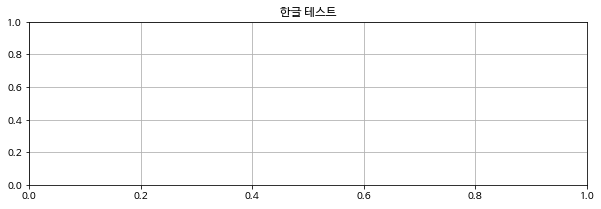

In [31]:
# 한글 폰트 설치와 폰트 캐시 재설정
!apt-get install -y -qq fonts-nanum
!rm -rf ~/.cache/matplotlib/*

# matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumBarunGothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 테스트')

## 설정 - matplotlib 전역 환경 설정
matplotlib 전역 환경을 파라미터들을 설정해 줍니다. 차트 이미지의 크기, 폰트, 라인 속성 등을 지정할 수 있습니다.

In [32]:
import matplotlib.pyplot as plt

plt.style.use('default')

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams["axes.grid"] = True

plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## 설정 - 판다스 출력 자리수

숫자가 커서 과학적 표기법(10의 승수로 표현)으로 표시되면 오히려 읽기 좋지 않은 경우가 있습니다.

pandas에서 수치값을 출력할 때 과학적 표기법을 사용하지 않고, 소수점 이하 몇 자리 출력할 것인지를 정해줍니다.

In [33]:
import pandas as pd
pd.options.display.float_format = '{:.1f}'.format

## 시가총액 비중의 변화 살펴보기

시가총액은 말그대로 기업의 규모 자체 입니다. 시장 전체에서 차지하는 시가총액의 비중을 살펴본다면 기업이 우리나라 산업 전체에서 차지하는 비중을 살펴볼 수 있다는 뜻이 되죠. 

조금 더 넓은 기간에 걸쳐 기업의 시가총액 비중을 살펴보는 것으로 특정 기업의 성장과 쇠퇴를 살펴볼 수 있습니다.

In [34]:
# 날짜별 상장종목수
df_marcap.groupby('Date').count()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank
Date,,,,,,,,,,,,,,,,,
1995-05-02,855,855,855,0,855,855,855,855,855,855,855,855,855,855,855,855,855
1995-05-03,857,857,857,0,857,857,857,857,857,857,857,857,857,857,857,857,857
1995-05-04,860,860,860,0,860,860,860,860,860,860,860,860,860,860,860,860,860
1995-05-06,842,842,842,0,842,842,842,842,842,842,842,842,842,842,842,842,842
1995-05-08,854,854,854,0,854,854,854,854,854,854,854,854,854,854,854,854,854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,2501,2501,2501,1571,2501,2501,2501,2501,2501,2501,2501,2501,2501,2501,2501,2501,2501
2022-01-25,2503,2503,2503,1573,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503,2503
2022-01-26,2505,2505,2505,1575,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505,2505


In [35]:
df_marcap.groupby('Date').sum()['Marcap'].tail(10)

Date
2022-01-17    2550027751602286
2022-01-18    2526059085234465
2022-01-19    2504920455475628
2022-01-20    2530375120494049
2022-01-21    2503465236776546
2022-01-24    2459889689174772
2022-01-25    2396586659628480
2022-01-26    2384942487218680
2022-01-27    2419786372563724
2022-01-28    2468108766757173
Name: Marcap, dtype: int64

2021-01-15 현재 상장주식시가총액은 2,508조 입니다

<AxesSubplot:xlabel='Date'>

findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans.


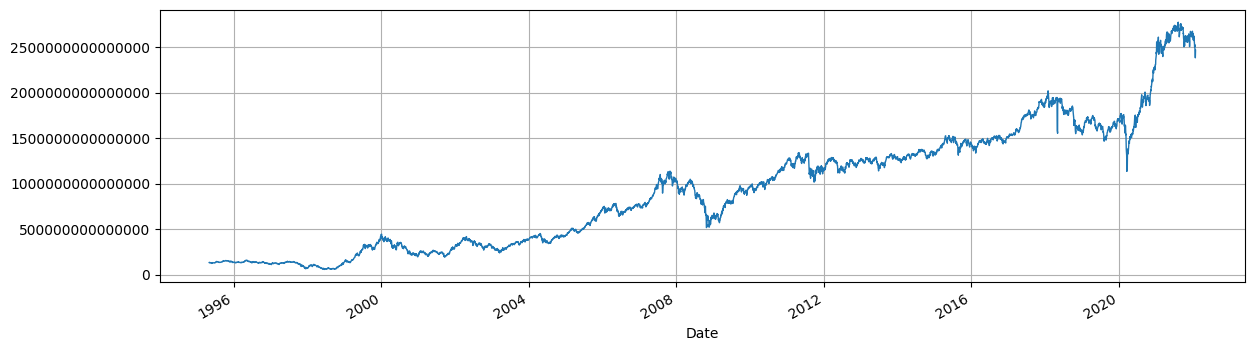

In [36]:
df_marcap.groupby('Date').sum()['Marcap'].plot()

In [37]:
df_stocks = df_marcap[df_marcap['Code'].isin(fav_stocks.keys())]
m = df_stocks.pivot_table(index='Date', columns='Code', values='Marcap')
m.rename(columns=fav_stocks, inplace=True)
m.tail(10)

Code,현대차,POSCO,삼성전자,한국전력,KB금융
Date,,,,,
2022-01-17,43801978335000.0,25502149237500.0,462658147625000.0,13673834840100.0,25447444704000.0
2022-01-18,43267807867500.0,24935434810000.0,459673256350000.0,13417049209300.0,25655348664000.0
2022-01-19,42840471493500.0,24804654557500.0,455494408565000.0,13449147413150.0,25738510248000.0
2022-01-20,43160973774000.0,24935434810000.0,456688365075000.0,13513343820850.0,24740571240000.0
2022-01-21,42733637400000.0,24586687470000.0,451315560780000.0,13641736636250.0,25073217576000.0
2022-01-24,42092632839000.0,23932786207500.0,448330669505000.0,13481245617000.0,24449505696000.0
2022-01-25,41558462371500.0,23235291527500.0,441763908700000.0,13256558190050.0,23742632232000.0
2022-01-26,40596955530000.0,23496852032500.0,437585060915000.0,13320754597750.0,24574248072000.0
2022-01-27,39849116875500.0,22450610012500.0,425645495815000.0,12903477947700.0,24116859360000.0


In [38]:
상장주식시가총액 = df_marcap.groupby('Date').sum()['Marcap']
상장주식시가총액

Date
1995-05-02     134713479923960
1995-05-03     137255450392250
1995-05-04     137395277384830
1995-05-06     137122266028070
1995-05-08     136361070157380
                    ...       
2022-01-24    2459889689174772
2022-01-25    2396586659628480
2022-01-26    2384942487218680
2022-01-27    2419786372563724
2022-01-28    2468108766757173
Name: Marcap, Length: 6775, dtype: int64

In [39]:
m.divide(상장주식시가총액, axis=0)

Code,현대차,POSCO,삼성전자,한국전력,KB금융
Date,,,,,
1995-05-02,0.0,0.0,0.0,0.1,NaN
1995-05-03,0.0,0.0,0.0,0.1,NaN
1995-05-04,0.0,0.0,0.0,0.1,NaN
1995-05-06,0.0,0.0,0.0,0.1,NaN
1995-05-08,0.0,0.0,0.0,0.1,NaN
...,...,...,...,...,...
2022-01-24,0.0,0.0,0.2,0.0,0.0
2022-01-25,0.0,0.0,0.2,0.0,0.0
2022-01-26,0.0,0.0,0.2,0.0,0.0


In [40]:
pd.options.display.float_format = '{:.4f}'.format

In [41]:
m['삼성전자'].div(상장주식시가총액)

Date
1995-05-02   0.0482
1995-05-03   0.0489
1995-05-04   0.0485
1995-05-06   0.0484
1995-05-08   0.0482
              ...  
2022-01-24   0.1823
2022-01-25   0.1843
2022-01-26   0.1835
2022-01-27   0.1759
2022-01-28   0.1773
Length: 6775, dtype: float64

In [ ]:
marcap_ratio.div(df_marcap.groupby('Date').sum()['Marcap'], axis=1)

In [ ]:
marcap_ratio.plot()

삼성전자가 다른 종목들에 비해 크게 나오기 때문에 나머지 종목간에 비교가 쉽지 않습니다.

컬럼을 지정하여 차트를 그립니다. 여기서는 '삼성전자'를 제외한 나머지 종목들 ['현대차', 'POSCO', '한국전력', 'KB금융']을 지정하려 차트로 그립니다.

In [ ]:
cols = ['현대차', 'POSCO', '한국전력', 'KB금융']
marcap_ratio[cols].plot()

2010년 이후 한국전력의 시총이 지속적으로 줄어들고 있다는 점과, 2010~2012년 동안 다른 종목들의 시총과 달리 현대차의 시총이 지속적으로 늘어나는 점이 눈에 띕니다.

2002년~2013년까지 현대차와 POSCO가 역상관을 보여주는 것도 흥미롭습니다.



시가총액 비중 데이터에 대한 간략한 통계량을 다음과 같이 산출할 수 있습니다.



In [ ]:
marcap_ratio.describe()

삼성전자의 2001년 이후 6.8% ~ 20.8% (평균 13.9%)의 시가총액 비중을 유지하고 있습니다. 

시가총액 비중 데이터의 표준편차(std)값이 가장 큰 종목이 `삼성전자`, 가장 작은 종목이 `KB금융` 입니다. 즉, 시가총액 비중의 변화가 '삼성전자'가 가장 컸고, 'KB금융'이 가장 작았다는 것을 알 수 있죠.

## 수정주가(Adjust Price)

수정주가(Adjust Price)란 총 발행 주식수의 변화를 반영한 가격을 말합니다. 액면분할, 액면병합, 유상증자, 무상증자와 같이 총 발행주식수의 변화가 발생하면 가격의 변화가 생깁니다. 예를 들어, 어떤 회사가 액면분할을 통해 1주를 2개로 쪼갠다고 하면, 주식수를 2배로 늘어나고 주식의 가격은 1/2로 낮아지며 시가총액은 동일하게 유지 됩니다.

실제 예를 들어보죠.

2018년 5월 4일, 삼성전자는 50:1로 액면분할을 합니다. 1주가 50주로 쪼개지는 것이죠. 이때 5000원인 삼성전자 주식 액면가는 액면분할 후 100원이 되었습니다. 액면분할 전에 주당 265만원(4월30일 기준)에서 5만3천원이 되었습니다.

이 가격 데이터를 그대로 사용한다면 주가가 하루만에 1/50로 다시말해 -98% 하락한 것이 됩니다.

In [ ]:
code = '005930' # 삼성전자(005930)
df_stock = marcap_date_range('2018-01-01', '2018-12-31', code)

df_stock['Close'].plot()

백테스트를 하기 위해서는 주식 가격 데이터의 연속성이 보장되어야 합니다. 삼성전자가 5월 4일에 -98% 하락한 것으로 계산하면 안되겠죠. 

발행 주식수가 변화하는 이벤트가 있는 경우 반드시 주식수를 변화를 함께 고려해야 합니다. 발행주식수의 변화를 반영한 가격을 수정주가(Adjusted Closing Price)라고 합니다. 백테스트를 위해서는 꼭 수정주가를 사용해야 합니다.

In [ ]:
df_stock['2018-04-25':'2018-05-09']

액면분할을 위해 2018-04-30 부터 2018-05-03 까지 3일간 거래정지되고 2018-05-04 부터 액면분할된 가격으로 거래가 시작된 것을 확인할 수 있습니다. 2018-05-03일 총 주식수 128,386,494주에서 다음날 총 주식수는 6,419,324,700주 로 50배가 늘어났습니다. 즉 50:1로 액면분할을 한 것이죠.

수정가격은 보통 오늘 가격과 총 주식수를 과거 데이터에 반영하여 구합니다. 혹은 특정 테스트 범위의 가장 마지막 날의 가격과 총 주식수를 기준으로 과거 가격들을 수정합니다.

주가는 보통 종가(Close)를 기준으로 하기 때문에 수정주가로 가장 많이 쓰이는 것이 바로 수정 종가(Adjust Close Price) 입니다.

In [ ]:
# 삼성전자(005930), 수정종가
code = '005930'
df_stock = marcap_date_range('2018-01-01', '2018-12-31', code)

latest_stocks = df_stock.iloc[-1]['Stocks'] # 범위 마지막날 주식수(기준)

df_stock['Adj Close'] = df_stock['Close'] * (df_stock['Stocks'] / latest_stocks) # 수정종가
df_stock['Adj Close'].plot()

다음과 같이 2018년 `종가`와 `수정 종가`를 같이 그려놓고 보면 더 확실하게 차이를 알 수 있습니다.

In [ ]:
df_stock[['Close', 'Adj Close']].plot(secondary_y=['Adj Close'])

특정 기간동안의 수익률을 정확하게 산정하기 위해서는 `수정 종가`로 계산해야 주식 가격의 연속성을 보장받을 수 있습니다.

## 섹터 분석

[FinanceDataReader](https://financedata.github.io/FinanceDataReader/)를 사용하면 간편하게 전체종목 코드와 섹터 데이터를 가져올 수 있습니다.


[FinanceDataReader](https://financedata.github.io/FinanceDataReader/)는 다음과 같이 설치합니다.

In [ ]:
!pip install -q finance-datareader

In [ ]:
import FinanceDataReader as fdr

df_master = fdr.StockListing('KRX')
df_master.head(10)

In [ ]:
len(df_master)

이 중에서 종목코드(Symbol)와 섹터(Sector) 데이터만 활용하려 합니다.

In [ ]:
df_master[['Symbol', 'Sector']].head(10)

특정한 일자의 시가총액 데이터를 가져옵니다.

In [ ]:
# 시가총액 데이터 2019-04-30
df_marcap = marcap_date('2019-04-30')

df_marcap[['Code', 'Name', 'Marcap']].head(10)

다음 두 데이터를 종목코드를 기준으로 병합합니다.

* 전체종목코드(df_master): 종목코드(Symbol), 섹터(Sector)
* 시가총액 데이터(df_marcap): 종목코드(Code), 종목명(Name), 시가총액(Marcap)


In [ ]:
df_merge = pd.merge(df_marcap[['Code', 'Name', 'Marcap']], df_master[['Symbol', 'Sector']], left_on='Code', right_on="Symbol")

print('row count:', len(df_merge))
df_merge.head(10)

섹터별 종목수 TOP 10을 산출합니다.

In [ ]:
df_sector_counts = df_merge['Sector'].value_counts()[:10]
df_sector_counts

종목수 기준으로 가장 많은 종목은 '특수 목적용 기계 제조업', '소프트웨어 개발 및 공급업', '전자부품 제조업' 순이네요.

섹터별 종목수 TOP 10을 파이차트로 표현해 봅니다. 특정 날짜(2019-04-30)의 섹터별 종목수 현황은 다음과 같습니다.



In [ ]:
df_sector_counts.plot.pie(figsize=(8, 8))

## 섹터별 시가총액

섹터별 시가총액을 구해봅니다.

In [ ]:
df_merge.head()

데이터를 섹터별로 묶어서(groupby) 덧셈(sum)을 하면 섹터별 시가총액을 구할 수 있습니다.

In [ ]:
df_merge.groupby('Sector').sum().head()

그리고, Marcap(시가총액) 역순으로 소트하여 처음 TOP 20개 섹터를 산출합니다

In [ ]:
df_sector_corp_marcap = df_merge.groupby('Sector').sum().sort_values('Marcap', ascending=False)[:20]
df_sector_corp_marcap

가로 막대차트로 표현하면 훨씬 더 잘 확인할 수 있죠.

In [ ]:
df_sector_corp_marcap[::-1].plot(kind='barh', figsize=(12, 8))

## 컬럼의 금액 단위 바꾸기

시가총액은 단위가 너무 커서 읽기가 어렵습니다. 좀 더 쉽게 보기 위해 조 단위로 바꾸어 봅니다.

In [ ]:
df = marcap_date('2019-05-10')

df['Marcap_trillion'] = df['Marcap'] / 1e12 # 원 단위에서 조(10^12) 단위로 변경
df.head()

개별 종목의 시가총액  df\['Marcap'\]을 10^12으로 나누어 조 단위로 변경하여 df\['Marcap_trillion'\]  컬럼을 추가하였습니다.

In [ ]:
df['Marcap_trillion'].sum()  # 시가총액 전체 (조단위)

시가총액 컬럼 df['Marcap_trillion']을 모두 더하면, 한국 주식시장 시가총액은 약 1,645.7 조원 입니다. (2019년 5월 10일 기준) 

시가총액 비중 df['MarcapRatio'] 의 합은 얼마일까? 

In [ ]:
df['MarcapRatio'].sum()

당연히 100(%)이 되어야 하겠지만 100보다 약간 작은 숫자가 됩니다.

시가총액 비중의 합이 100이 안되는 이유는 대부분의 종목들이 너무 작은 비중을 차지하기 때문이다.
한국 주식시장에서 시가총액 비중이 0.01% 이 넘으려면 대략 1,200등 안에는 들어야 합니다. 다시 말해, 전체 종목(2133개)의 대략 절반 정도는 시가총액 비중이 0.01% 가 안된다는 의미이기도 한 것이죠.

## 결론
시가총액(marcap) 데이터셋 뿐만 아니라 25년간 개별 종목의 가격 등 다양한 데이터를 포함하고 있습니다. 뿐만 아니라 발행 주식수가 데이터에 포함되어 있으므로 수정주가(Adjust Price)을 산출할 수 있습니다.

특정 분야의 종목의 시총을 일자별로 합산하면 특정 영역의 혹은 특정 산업의 트렌드를 분석하는데도 요긴하게 사용할 수 있으며, 산업의 규모나 트렌드 분석을 위한 좋은 데이터셋 입니다.

주피터 노트북(혹은 구글 Colab)을 통해 간편하게 데이터를 가져와 다양한 분석을 해볼 수 있도록 정리하였으며 관심있는 분들에게 도움이 되시길 바랍니다.

#### 2018 - 2021 [FinanceData.KR]()